In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from apps.genetic_algorithms.genetic_program import FitnessFunction
from apps.genetic_algorithms.gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript

CONDENSED_COLS = ['individual_str', 'transaction_currency', 'counter_currency', 'profit_percent', 'benchmark_profit_percent']

%matplotlib inline
pd.set_option('display.max_columns', 500)

from apps.doge.doge_train_test import DogeTrainer
from settings import DOGE_TRAINING_PERIOD_DURATION_SECONDS
import time
end_timestamp = int(time.time())  # UTC timestamp
start_timestamp = end_timestamp - DOGE_TRAINING_PERIOD_DURATION_SECONDS
ticker = 'BTC_USDT'

e = DogeTrainer.run_training(start_timestamp, end_timestamp, ticker)
            


INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 56.19% out of 39.20G
DEBUG:matplotlib:CACHEDIR=/Users/karla/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/karla/.matplotlib/fontList.json
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
INFO:root:>>>>>>> Starting GP training... 
INFO:root:    >>> start_time = 2019/02/01 15:05:00 UTC
INFO:root:    >>> end_time = 2019/02/01 16:00:00 UTC
INFO:root:Loaded 5 rockstars.
INFO:root: >>>>>>>> Building a data object for BTC_USDT...
CRITICAL:root:Encountered duplicate values in price data data, 13 values loaded, 12 remain after removal.
INFO:root:Retrieving values for rsi
INFO:root:Going to Redis for indicator rsi for BTC_USDT at 1549036800...
INFO:root:Retrieving values for sma20
INFO:root:Going to Re

### Looking at performance per training dataset and across all experiment variants
For each training dataset in the training collection, we get a performance dataframe sorted by profit. The dataframes and best individuals in them are shown below.

Experiment id: run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs



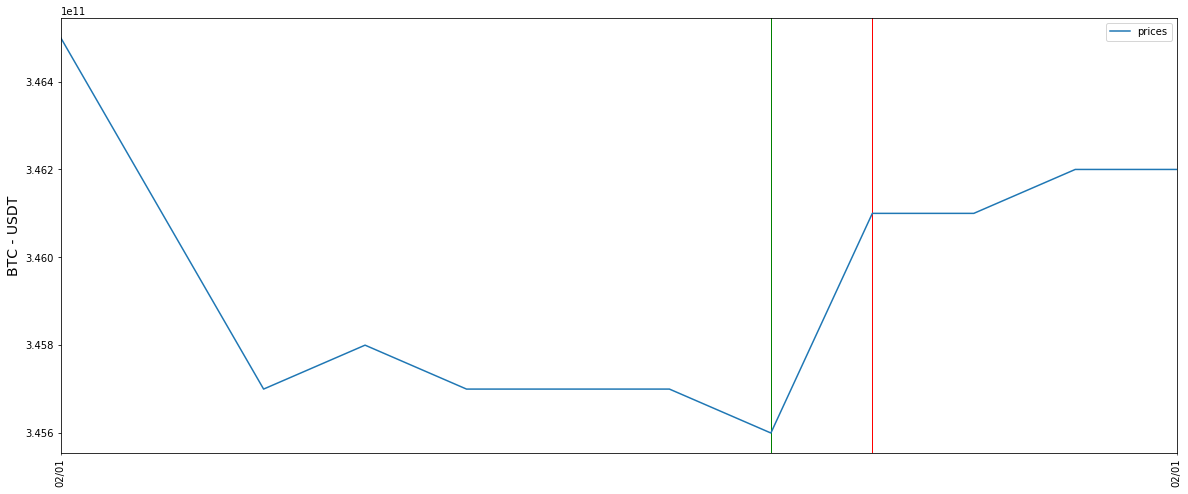

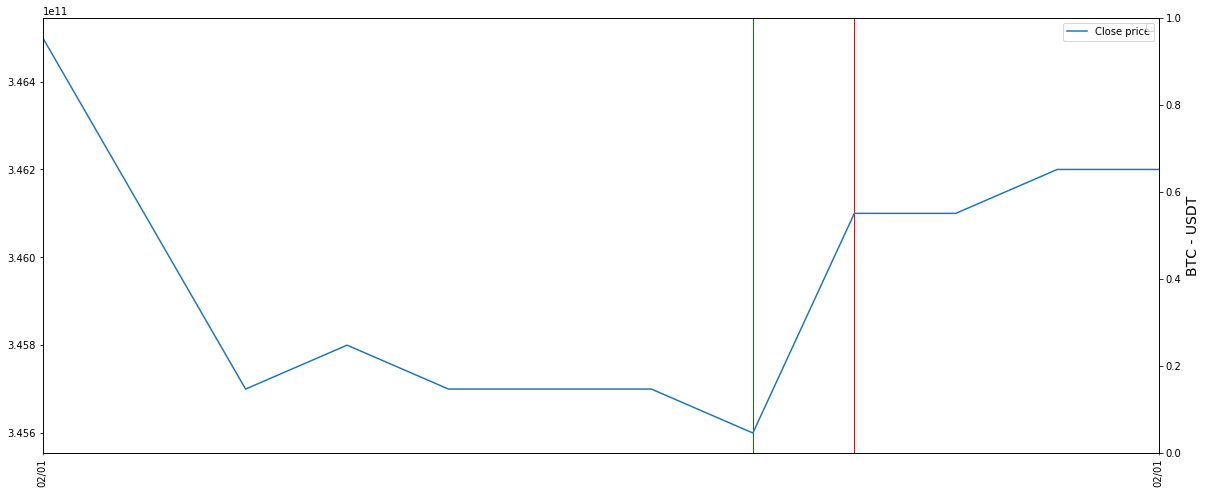

String representation:
if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), buy, sell), if_then_else(bbands_bearish_cross(ARG0), buy, sell))



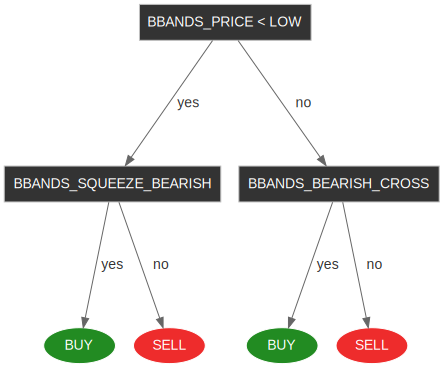

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/02/01 15:05:00 UTC
--
--
2019/02/01 15:40:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345600000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/02/01 15:40:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.890625e-09
2019/02/01 15:45:00 UTC  	 OrderType.SELL   	 delta_cash ->        999.44 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 346100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/02/01 15:45:00 UTC rsi_value=None
   cash: 999.4448671875    crypto: 0.0
End time: 2019/02/01 16:00:00 UTC

Summary
--
Number of trades: 2
End cash: 999.44 USDT
End crypto: 0.000000 BTC
End price: 346200000000.0
Total value invested: 1000 USDT
Total value after investment: 999.44 USDT 

In [3]:
performance_dfs = e.get_joined_performance_dfs_over_all_variants()

We can explore each of the performance dataframes in more detail.

In [4]:
pd.set_option('display.max_colwidth', -1)
performance_dfs[0][CONDENSED_COLS]

,individual_str,transaction_currency,counter_currency,profit_percent,benchmark_profit_percent
0,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), buy, sell), if_then_else(bbands_bearish_cross(ARG0), buy, sell))",BTC,USDT,-0.055513,-0.286307
1,"if_then_else(rsi_gt_70(ARG0), sell, if_then_else(xor(rsi_lt_25(ARG0), bbands_bullish_cross(ARG0)), buy, sell))",BTC,USDT,-0.055513,-0.286307
8,"if_then_else(rsi_gt_70(ARG0), sell, if_then_else(bbands_price_lt_low(ARG0), buy, sell))",BTC,USDT,-0.055513,-0.286307
7,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(candlestick_momentum_sell(ARG0), if_then_else(bbands_price_lt_low(ARG0), buy, sell), if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",BTC,USDT,-0.055513,-0.286307
6,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(bbands_price_lt_low(ARG0), bbands_squeeze_bullish(ARG0)), buy, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(candlestick_momentum_sell(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",BTC,USDT,-0.055513,-0.286307
5,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(bbands_squeeze_bearish(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",BTC,USDT,-0.055513,-0.286307
4,"if_then_else(rsi_gt_75(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), buy, ignore), if_then_else(rsi_gt_80(ARG0), sell, if_then_else(bbands_price_lt_low(ARG0), buy, sell)))",BTC,USDT,-0.055513,-0.286307
3,"if_then_else(rsi_lt_25(ARG0), buy, if_then_else(candlestick_momentum_sell(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",BTC,USDT,-0.055513,-0.286307
2,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), sell, if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(candlestick_momentum_sell(ARG0), if_then_else(bbands_price_lt_low(ARG0), buy, sell), if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",BTC,USDT,-0.055513,-0.286307
1,"if_then_else(rsi_gt_70(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(bbands_squeeze_bearish(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",BTC,USDT,-0.055513,-0.286307


Experiment id: run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs



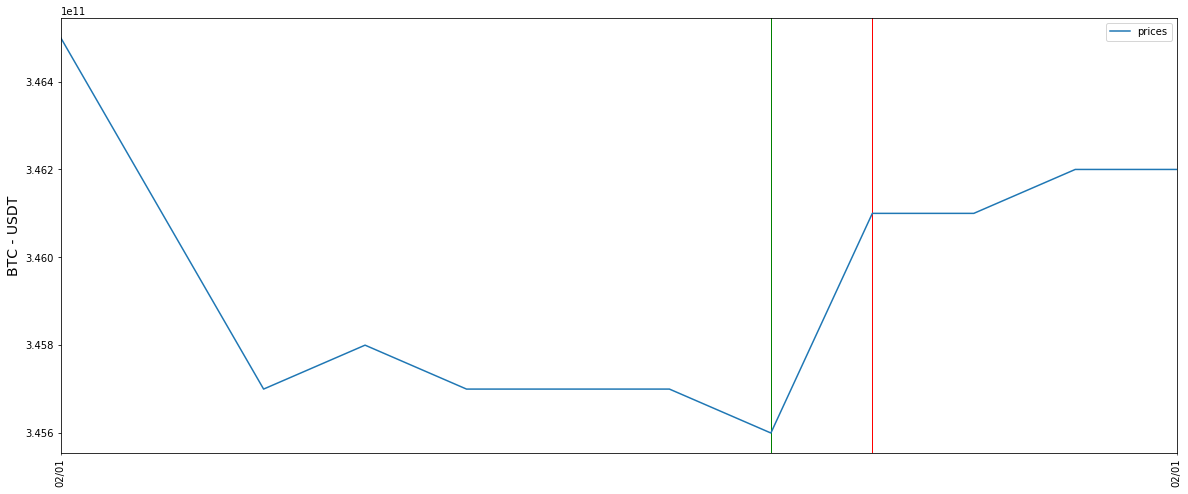

String representation:
if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), buy, sell), if_then_else(bbands_bearish_cross(ARG0), buy, sell))



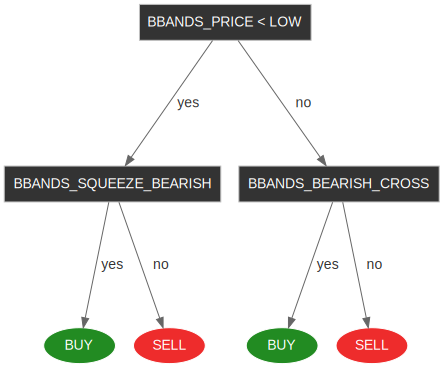

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/02/01 15:05:00 UTC
--
--
2019/02/01 15:40:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345600000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/02/01 15:40:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.890625e-09
2019/02/01 15:45:00 UTC  	 OrderType.SELL   	 delta_cash ->        999.44 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 346100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/02/01 15:45:00 UTC rsi_value=None
   cash: 999.4448671875    crypto: 0.0
End time: 2019/02/01 16:00:00 UTC

Summary
--
Number of trades: 2
End cash: 999.44 USDT
End crypto: 0.000000 BTC
End price: 346200000000.0
Total value invested: 1000 USDT
Total value after investment: 999.44 USDT 

In [5]:
e.performance_df_row_info(performance_dfs[0].iloc[0])

### Best performing individuals across all variants and datasets
Each experiment variant will have a winner, the doge baby that had the best fitness value. We can get these winners by invoking the command below:

In [6]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_variants_and_datasets(e.training_data, sort_by=["fitness_value"])

In [7]:
pd.set_option('display.max_colwidth', -1)
best_individuals_across_variants_and_datasets.drop(['individual','variant','evaluations'], axis=1)




,experiment_name,doge,fitness_function,fitness_value,mean_profit,std_profit,max_profit,min_profit,all_profits,benchmark_profits,differences
0,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs,"if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), buy, sell), if_then_else(bbands_bearish_cross(ARG0), buy, sell))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
1,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs,"if_then_else(rsi_gt_70(ARG0), sell, if_then_else(xor(rsi_lt_25(ARG0), bbands_bullish_cross(ARG0)), buy, sell))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
2,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs,"if_then_else(bbands_price_gt_up(ARG0), sell, if_then_else(bbands_price_lt_low(ARG0), buy, sell))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
3,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(candlestick_momentum_sell(ARG0), if_then_else(bbands_price_lt_low(ARG0), buy, ignore), if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
4,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), ignore, if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(bbands_squeeze_bearish(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
5,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_0.8;n_50;gen_5;td_5;a;nrs,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(bbands_bearish_cross(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_price_lt_low(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
6,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_1.0;n_50;gen_5;td_5;a;nrs,"if_then_else(rsi_lt_25(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, ignore), if_then_else(xor(rsi_gt_70(ARG0), bbands_squeeze_bullish(ARG0)), ignore, if_then_else(rsi_lt_25(ARG0), sell, ignore))), if_then_else(bbands_squeeze_bearish(ARG0), buy, if_then_else(rsi_gt_70(ARG0), if_then_else(bbands_bullish_cross(ARG0), sell, ignore), if_then_else(bbands_price_lt_low(ARG0), buy, sell))))",ff_benchmarkdiffabs,0.012812,-0.055513,0.0,-0.055513,-0.055513,-0.055513281250000546,-0.2863070129870039,0.23079373173700335
7,run_evolution.d_BTC-USDT-1549033500-1549036800;gv6;ff_benchmarkdiffabs;x_0.9;m_1.0;n_50;gen_5;td_5;a;nrs,"if_then_else(rsi_gt_70(ARG0), if_then_else(rsi_lt_30(ARG0), if_then_else(rsi_gt_75(ARG0), sell, 

### How did this individual perform on training sets?

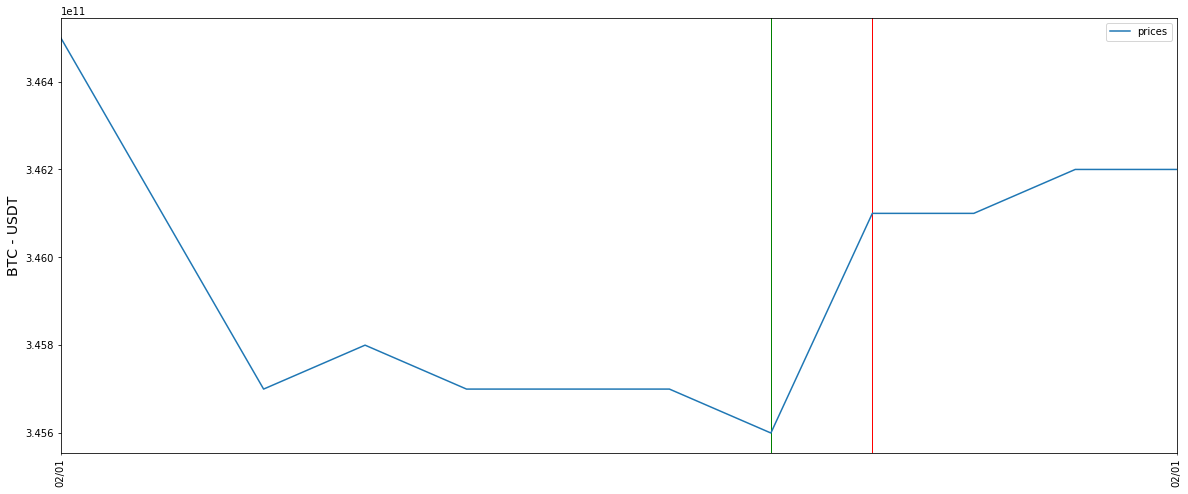

String representation:
if_then_else(bbands_price_lt_low(ARG0), if_then_else(bbands_squeeze_bearish(ARG0), buy, sell), if_then_else(bbands_bearish_cross(ARG0), buy, sell))



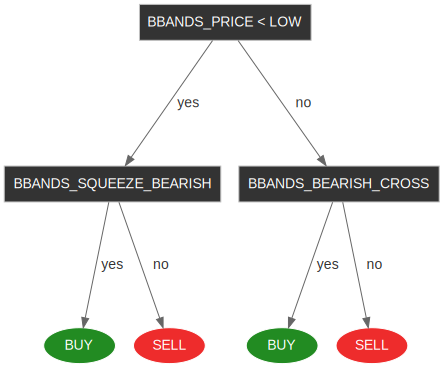

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2019/02/01 15:05:00 UTC
--
--
2019/02/01 15:40:00 UTC  	 OrderType.BUY    	 delta_cash ->      -1000.00 USDT 	 delta_currency ->      0.000000 BTC 	 (1 BTC = 345600000000.00000000 USDT ), slippage = 0.00
   signal: genetic_up BTC-USDT strength=3 trend=1 horizon=None timestamp=2019/02/01 15:40:00 UTC rsi_value=None
   cash: 0.0    crypto: 2.890625e-09
2019/02/01 15:45:00 UTC  	 OrderType.SELL   	 delta_cash ->        999.44 USDT 	 delta_currency ->     -0.000000 BTC 	 (1 BTC = 346100000000.00000000 USDT ), slippage = 0.00
   signal: genetic_down BTC-USDT strength=3 trend=-1 horizon=None timestamp=2019/02/01 15:45:00 UTC rsi_value=None
   cash: 999.4448671875    crypto: 0.0
End time: 2019/02/01 16:00:00 UTC

Summary
--
Number of trades: 2
End cash: 999.44 USDT
End crypto: 0.000000 BTC
End price: 346200000000.0
Total value invested: 1000 USDT
Total value after investment: 999.44 USDT 

In [8]:
best_overall = best_individuals_across_variants_and_datasets.iloc[0]
evaluations = best_overall.evaluations
for evaluation in evaluations:
    e._print_individual_info(best_overall.individual, evaluation)

### Let's see its performance on the validation set...

In [ ]:
evaluation = e._build_evaluation_object(best_overall.individual, best_overall.variant, e.validation_data[0])
e._print_individual_info(best_overall.individual, evaluation)

In [ ]:
perf = e.evaluate_individual_on_data_collection(best_overall.individual, best_overall.variant, e.validation_data)
#perf = perf.drop(['individual'], axis=1)
perf[CONDENSED_COLS]

In [ ]:
doge = DogeDNACanvas(best_overall.individual,"container")
HTML(doge.create_container())

In [ ]:
Javascript(doge.show())